УРОВЕНЬ 1

In [58]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [54]:
total = df.shape[0]
print(total)
kids_amount = df[df.Age < 18].shape[0]
percentage_kids = (kids_amount / total) * 100
print(f"Процент детей: {percentage_kids}")

891
Процент детей: 12.682379349046016


In [5]:
men_amount = df[df.Sex == 'male'].shape[0]
women_amount = df[df.Sex == 'female'].shape[0]
print(f"Количество мужчин: {men_amount}, количество женщин: {women_amount}")

Количество мужчин: 577, количество женщин: 314


Посчитать, по скольким людям нет информации (пола или возраста)

In [6]:
none_info = df[df['Age'].isna() | df['Sex'].isna()].shape[0]
none_info

177

Вывести гистограмму по возрасту:

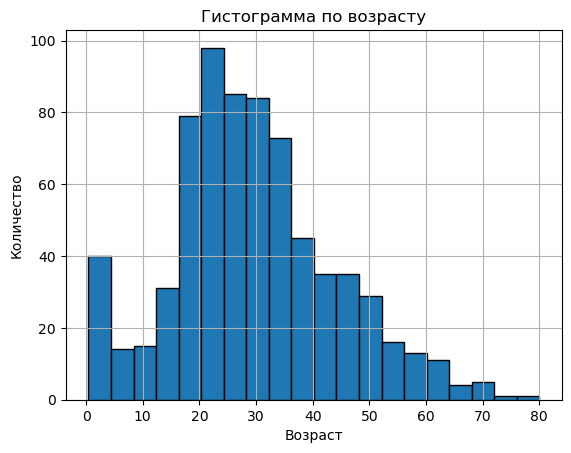

In [7]:
df['Age'].hist(bins=20, edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('Гистограмма по возрасту')
plt.show()

УРОВЕНЬ 2
Посчитать, какой процент мужчин и женщин выжили, какой процент детей выжили.

In [12]:
survived_men = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
survived_women = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
survived_kids = df[(df['Age'] < 18) & (df['Survived'] == 1)].shape[0]
survived_men_percent = (survived_men / men_amount) * 100
survived_women_percent = (survived_women / women_amount) * 100
survived_kids_percent = (survived_kids / kids_amount) * 100

print(f"Выжило {survived_men_percent} мужчин, {survived_women_percent} женщин, {survived_kids_percent} детей")

Выжило 18.890814558058924 мужчин, 74.20382165605095 женщин, 53.98230088495575 детей


In [34]:
df = df.dropna(subset=["Sex", "Age", "Pclass"])
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df

D:\Users\aomurbaeva\AppData\Local\Temp\ipykernel_24048\1882136347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


Считаем сколько людей выжило из 1, 2 и 3 класса:

In [23]:
first_class = df[(df['Pclass'] == 1) & (df['Survived'] == 1)].shape[0]
first_class_total = df[(df['Pclass'] == 1)].shape[0]

second_class = df[(df['Pclass'] == 2) & (df['Survived'] == 1)].shape[0]
second_class_total = df[(df['Pclass'] == 2)].shape[0]

third_class = df[(df['Pclass'] == 3) & (df['Survived'] == 1)].shape[0]
third_class_total = df[(df['Pclass'] == 3)].shape[0]

print(f"Выжило в первом классе: {first_class} из {first_class_total}, втором классе: {second_class} из {second_class_total}, третьем классе: {third_class} из {third_class_total}")

Выжило в первом классе: 122 из 186, втором классе: 83 из 173, третьем классе: 85 из 355


In [40]:
#Проверяю сколько в 1 классе выжило мужчин. Исходя из результата видно что женщины и дети в 1 классе выжили почти все
first_class_men_survived = df[(df['Pclass'] == 1) & (df['Survived'] == 1) & (df['Sex'] == 0)].shape[0]
first_class_men = df[(df['Pclass'] == 1) & (df['Sex'] == 0)].shape[0]
print(f"В первом классе выжило {first_class_men_survived} мужчин из {first_class_men}")


В первом классе выжило 40 мужчин из 101


Сделаем вывод по 1 классу. Думаю нет смысла смотреть дальше. Тк всего человек было 186, из них 101 - мужчины. 85 - женщины и дети. 122 - 40 = 82, итого почти все выжили. Для мужчин выжить шанс примерно 40%

In [41]:
#Проверяю сколько в 2 классе выжило мужчин
second_class_men_survived = df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Sex'] == 0)].shape[0]
second_class_men = df[(df['Pclass'] == 2) & (df['Sex'] == 0)].shape[0]
print(f"Во втором классе выжило {second_class_men_survived} мужчин из {second_class_men}")

#Проверяю сколько в 2 классе выжило женщин.
second_class_women_survived = df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Sex'] == 1)].shape[0]
second_class_women = df[(df['Pclass'] == 2) & (df['Sex'] == 1)].shape[0]
print(f"Во втором классе выжило {second_class_women_survived} женщин из {second_class_women}")

#Проверяю сколько в 2 классе выжило детей.
second_class_kids_survived = df[(df['Pclass'] == 2) & (df['Survived'] == 1) & (df['Age'] < 18)].shape[0]
second_class_kids = df[(df['Pclass'] == 2) & (df['Age'] < 18)].shape[0]
print(f"Во втором классе выжило {second_class_kids_survived} детей из {second_class_kids}")

Во втором классе выжило 15 мужчин из 99
Во втором классе выжило 68 женщин из 74
Во втором классе выжило 21 детей из 23


Вывод такой же. Во 2 классе выжили женщины и дети

In [42]:
#Проверяю сколько в 3 классе выжило мужчин
third_class_men_survived = df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Sex'] == 0)].shape[0]
third_class_men = df[(df['Pclass'] == 3) & (df['Sex'] == 0)].shape[0]
print(f"В третьем классе выжило {third_class_men_survived} мужчин из {third_class_men}")

#Проверяю сколько в 3 классе выжило женщин.
third_class_women_survived = df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Sex'] == 1)].shape[0]
third_class_women = df[(df['Pclass'] == 3) & (df['Sex'] == 1)].shape[0]
print(f"В третьем классе выжило {third_class_women_survived} женщин из {third_class_women}")

#Проверяю сколько в 3 классе выжило детей.
third_class_kids_survived = df[(df['Pclass'] == 3) & (df['Survived'] == 1) & (df['Age'] < 18)].shape[0]
third_class_kids = df[(df['Pclass'] == 3) & (df['Age'] < 18)].shape[0]
print(f"В третьем классе выжило {third_class_kids_survived} детей из {third_class_kids}")

В третьем классе выжило 38 мужчин из 253
В третьем классе выжило 47 женщин из 102
В третьем классе выжило 29 детей из 78


В третьем классе мало кто выжил в целом. (15% мужчин, 46% женщин, 37% детей)

УРОВЕНЬ 3
Сделав вывод по данным, написать простейшую модель, которая будет определять по входным данным, выжил ли человек. Проверить свою гипотезу на данных train.csv, оценить успешность модели. Прогнать модель на файле test.csv

In [16]:
X = df[['Sex', 'Age', 'Pclass']]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print (X_test)
print (y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

     Sex   Age  Pclass
721    0  17.0       3
607    0  27.0       1
357    1  38.0       2
191    0  19.0       2
555    0  62.0       1
..   ...   ...     ...
3      1  35.0       1
265    0  36.0       2
801    1  31.0       2
577    1  39.0       1
343    0  25.0       2

[143 rows x 3 columns]
[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0
 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0]
Точность модели: 0.83


In [75]:
def survival_prediction(sex, age, pclass): #Пол мужской - 0, женский - 1
    gender = [0, 1]
    if sex == None:
        sex = np.random.choice(gender, p=[0.65, 0.35]) #64.7 - процент мужчин от всех пассажиров. Если использовать iloc, то всега выводит male
        print(sex)
    if age is None:
        age = df['Age'].mean()  #Заменяю на средний возраст
    if pclass is None:
        pclass = df['Pclass'].mode().iloc[0] #Заменяю на самыый часто встречающийся класс
        
    new_data = pd.DataFrame({'Sex': [sex], 'Age': [age], 'Pclass': [pclass]}) 
    print(f"Пол: {sex}, возраст: {age}, Класс: {pclass}")
    prediction = model.predict(new_data)
    
    if prediction[0] == 1:
        print("Предсказание: Выживет")
    else:
        print("Предсказание: Не выживет")
survival_prediction(None, None, None)

1
Пол: 1, возраст: 29.69911764705882, Класс: 3
Предсказание: Выживет


In [18]:
new_data = pd.read_csv('test.csv')
new_data = new_data.dropna(subset=["Sex", "Age", "Pclass"])
new_data['Sex'] = new_data['Sex'].map({'male': 0, 'female': 1})
predictions = model.predict(new_data[['Sex', 'Age', 'Pclass']])

print("Предсказанные результаты:")
print(predictions)
print(f'Точность модели: {accuracy:.2f}')

Предсказанные результаты:
[0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1
 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0
 1 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0]
Точность модели: 0.83


In [76]:
def is_survived(age, sex, pclass):
    gender = [0, 1]
    if sex == None:
        sex = np.random.choice(gender, p=[0.65, 0.35]) #64.7 - процент мужчин от всех пассажиров
    if age is None:
        age = df['Age'].mean()  #Заменяю на средний возраст
    if pclass is None:
        pclass = df['Pclass'].mode().iloc[0] #Заменяю на самыый часто встречающийся класс
        
    choices = ["Выживет", "Не выживет"]
    if (sex == 1 or age < 18)  and (pclass == 1 or pclass == 2):
        return "Выживет"
    elif (sex == 0 and pclass == 1) or (sex == 1 and pclass == 3) or (Age < 18 and pclass == 3):
        return np.random.choice(choices, p=[0.4, 0.6]) # Потому что от 37 до 46% выжили в этих случаях
    else:
        return "Не выживет"
        
print(is_survived(20, None, 1))

Выживет
